In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## Binary Calssifiaction

In [63]:
df = pd.read_csv('insurance_data.csv')

In [65]:
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


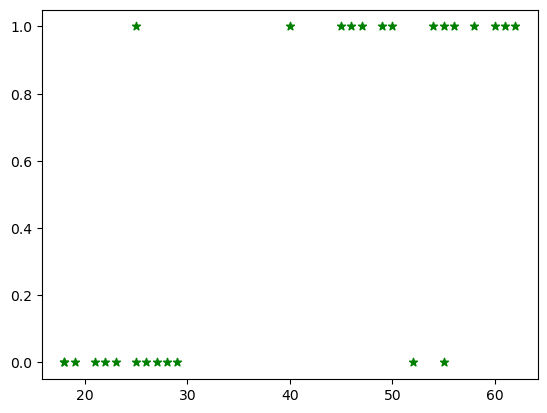

In [67]:
plt.scatter(df.age,df.bought_insurance,marker = '*' ,color = 'green')

In [69]:
X = df[['age']]
y = df['bought_insurance']

In [71]:
from sklearn.model_selection import train_test_split

In [73]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1)

In [75]:
X_train

,age
5,56
16,25
6,55
25,54
18,19
21,26
14,49
13,29
23,45
8,62


In [77]:
y_train

5     1
16    1
6     0
25    1
18    0
21    0
14    1
13    0
23    1
8     1
4     1
26    0
12    0
7     1
9     1
2     1
15    1
24    1
10    0
3     0
19    0
11    0
0     0
20    0
Name: bought_insurance, dtype: int64

In [79]:
X_test

,age
22,40
17,58
1,25


In [81]:
y_test

22    1
17    1
1     0
Name: bought_insurance, dtype: int64

In [83]:
from sklearn.linear_model import LogisticRegression

In [85]:
model = LogisticRegression()

In [87]:
model.fit(X_train,y_train)

LogisticRegression()

In [89]:
model.predict(X_test)

array([1, 1, 0])

In [91]:
X_test

,age
22,40
17,58
1,25


In [93]:
y_test

22    1
17    1
1     0
Name: bought_insurance, dtype: int64

In [95]:
model.score(X_test,y_test)

1.0

In [97]:
model.predict_proba(X_test)

array([[0.49694339, 0.50305661],
       [0.08801598, 0.91198402],
       [0.87280653, 0.12719347]])

In [99]:
df = pd.read_csv('HR_comma_sep.csv')

In [101]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


##  model.coef_ indicates value of m in y=m*x + b equation

In [112]:
m = model.coef_
print(f"Value of m is {m}")

Value of m is [[0.12921542]]


## model.intercept_ indicates value of b in y=m*x + b equation

In [116]:
b  =model.intercept_
print(f"Value of b is {b}")

Value of b is [-5.15639006]


## Lets defined sigmoid function now and do the math with hand

In [54]:
import math
def sigmoid(x):
    return 1 / (1+math.exp(-x))

In [58]:
def prediction_function(age):
    z = 0.042 * age - 1.53 # 0.04150133 ~ 0.042 and -1.52726963 ~ -1.53
    y = sigmoid(z)
    return y
    


In [122]:
age = 25
prediction_function(age)

0.382252125230751

In [131]:
df = pd.read_csv('HR_comma_sep.csv')

- Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
- Plot bar charts showing impact of employee salaries on retention
- Plot bar charts showing corelation between department and employee retention
- Now build logistic regression model using variables that were narrowed down in step 1
- Measure the accuracy of the model

In [135]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


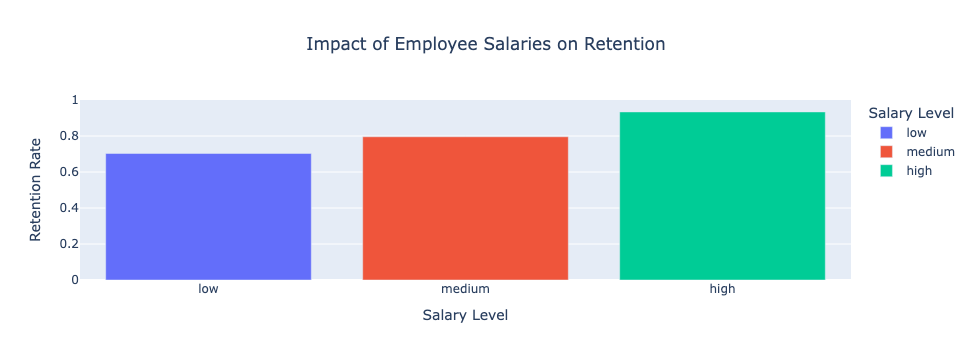

In [165]:
import pandas as pd
import plotly.express as px
# Create 'retained' column: 1 if employee stayed (left == 0), 0 otherwise
df['retained'] = 1 - df['left']

# Group by salary and calculate average retention rate
retention_by_salary = df.groupby('salary')['retained'].mean().reset_index()

# Order salary levels
salary_order = ['low', 'medium', 'high']

fig = px.bar(
    retention_by_salary,
    x = 'salary',
    y = 'retained',
    color = 'salary',
    labels={'salary': 'Salary Level', 'retained': 'Retention Rate'},
    title='Impact of Employee Salaries on Retention',
    category_orders={'salary': salary_order}
)
fig.update_layout(
    yaxis=dict(range=[0, 1]),
    xaxis_title='Salary Level',
    yaxis_title='Retention Rate',
    title_x=0.5
)

fig.show()


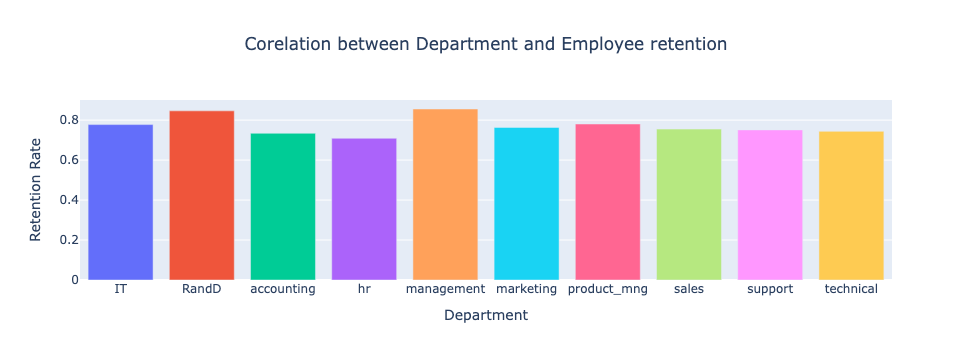

In [183]:
dept = df.groupby('Department')['retained'].mean().reset_index()
fig = px.bar(
    dept,
    x = 'Department',
    y = 'retained',
    color = 'Department',
    title = 'Corelation between Department and Employee retention'
)
fig.update_layout(
    showlegend = False,
    xaxis_title='Department',
    yaxis_title='Retention Rate',
    title_x=0.5
    
)
fig.show()

In [189]:
X = df[['Department', 'average_montly_hours','satisfaction_level','promotion_last_5years', 'salary','time_spend_company']]

In [193]:
y = df['retained']

In [195]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary', 'retained'],
      dtype='object')

In [239]:
X = pd.get_dummies(X, drop_first=True)

In [241]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [243]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.1)

In [265]:
model = LogisticRegression(max_iter=1000)

In [267]:
X.head()

,average_montly_hours,satisfaction_level,promotion_last_5years,time_spend_company,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium
0,157,0.38,0,3,False,False,False,False,False,False,True,False,False,True,False
1,262,0.80,0,6,False,False,False,False,False,False,True,False,False,False,True
2,272,0.11,0,4,False,False,False,False,False,False,True,False,False,False,True
3,223,0.72,0,5,False,False,False,False,False,False,True,False,False,True,False
4,159,0.37,0,3,False,False,False,False,False,False,True,False,False,True,False


In [269]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [271]:
model.predict(X_test)

array([1, 1, 1, ..., 1, 1, 1])

In [273]:
model.score(X_test,y_test)

0.772

In [1]:
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()

In [4]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

<Figure size 640x480 with 0 Axes>

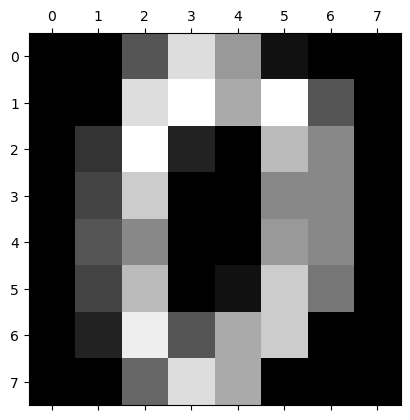

In [6]:
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[0])